## Training a word2vec model from scratch

-- Prof. Dorien Herremans

We will start by training a word2vec model from scratch using the gensim library. You will need to ensure that you have gensim installed, and a file decompressor to load our dataset. 

Note: these models may take a while to train. Be sure to switch the runtime of  Google Colab to us a TPU or GPU hardware accellerator (in the menu at the top). 

Let's start by installing some libraries that we will use:

In [1]:
!pip install gensim
!pip install wget

     |████████████████████████████████| 24.7MB 11.9MB/s eta 0:00:01    |██████████████████▎             | 14.1MB 2.0MB/s eta 0:00:06
     |████████████████████████████████| 71kB 4.3MB/s eta 0:00:01
     |████████████████████████████████| 1.4MB 2.8MB/s eta 0:00:01
     |████████████████████████████████| 133kB 5.6MB/s eta 0:00:01
     |████████████████████████████████| 5.4MB 2.4MB/s eta 0:00:01
     |████████████████████████████████| 71kB 4.3MB/s eta 0:00:011
     |████████████████████████████████| 552kB 2.8MB/s eta 0:00:01
  Stored in directory: /Users/pengfei/Library/Caches/pip/wheels/ab/10/93/5cff86f5b721d77edaecc29959b1c60d894be1f66d91407d28
Successfully built smart-open
  Stored in directory: /Users/pengfei/Library/Caches/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


Now we can import these libraries:

In [2]:
# imports needed 
import gensim
import wget

We will train our model using a very small dataset for demonstrative purposes. Note that for a real data science project you should train on a much larger dataset. 

We will use the complete works of Shakespeare. You can find the file at https://dorienherremans.com/drop/CDS/CNNs/shakespeare.txt

In [5]:
# download the dataset
!wget "https://dorienherremans.com/drop/CDS/CNNs/shakespeare.txt"

--2019-11-14 18:47:34--  https://dorienherremans.com/drop/CDS/CNNs/shakespeare.txt
Resolving dorienherremans.com (dorienherremans.com)... 96.127.180.74
Connecting to dorienherremans.com (dorienherremans.com)|96.127.180.74|:443... failed: Operation timed out.
Retrying.

--2019-11-14 18:48:51--  (try: 2)  https://dorienherremans.com/drop/CDS/CNNs/shakespeare.txt
Connecting to dorienherremans.com (dorienherremans.com)|96.127.180.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5447743 (5.2M) [text/plain]
Saving to: ‘shakespeare.txt’

shakespeare.txt     100%[===================>]   5.20M  22.7KB/s    in 5m 26s  

2019-11-14 18:54:21 (16.3 KB/s) - ‘shakespeare.txt’ saved [5447743/5447743]



Let's read the input file and convert each line into a list of words (tokenizing). Do do this, we create a function read_input which is called in the penultimate line below: 

In [6]:
def read_input(input_file):
    print("reading file...")

    with open (input_file, 'r') as f: 
        lines = f.readlines()
        for line in lines:
        # do some pre-processing and return a (tokenized) list      # of words for each review text
        # you can print the output here to understand  # the preprocessing (tokenizing)
            yield  gensim.utils.simple_preprocess  (line)

# each review item new becomes a series of words # this is a list of lists
# point to the location on your filesystem
data_file  =  'shakespeare.txt'

documents = list (read_input (data_file))
print("Done reading data file")


reading file...
Done reading data file


Now let's train the word2vec model using our document variable (which is a list of word lists). Note that you can specify a number of hyperparameters below:
* min_count removes all words that occur less then min_count
* window: window size in the skip-gram
* workers: how many threads to use
* size: number of dimension of your new word embedding vector (typically 100-200). Smaller datasets require a smaller number



In [7]:
model  =  gensim.models.Word2Vec(documents,  size=150,  window=5,  min_count=2,  workers=4)
model.train(documents,total_examples=len(documents),epochs=10)

(6704131, 8675160)

That's it! Now you've trained the model! 

Now let's explore some properties of our new word space. You can get the words most close (read:  most similar) to a given word. Remember, the only texts the model has seen is shakespeare!

In [9]:
w1 = "king"
model.wv.most_similar  (positive=w1)

[('prince', 0.6451050043106079),
 ('duke', 0.5984484553337097),
 ('warwick', 0.5718879699707031),
 ('emperor', 0.5330439805984497),
 ('bolingbroke', 0.5313977003097534),
 ('fifth', 0.5231500267982483),
 ('plantagenets', 0.5175158381462097),
 ('bastard', 0.5165777206420898),
 ('plantagenet', 0.49977225065231323),
 ('gaunt', 0.4962276816368103)]

In [10]:
# look up top 6 words similar to 'smile'
w1 = ["smile"]
model.wv.most_similar  (positive=w1,topn=6)


[('laugh', 0.7429768443107605),
 ('tremble', 0.7163074016571045),
 ('shine', 0.6790613532066345),
 ('rail', 0.6767793297767639),
 ('grieve', 0.6707180142402649),
 ('scowl', 0.6663979887962341)]

In [11]:
# look up top 6 words similar to 'france'
w1 = ["france"]
model.wv.most_similar  (positive=w1,topn=6)

[('england', 0.6916472315788269),
 ('egypt', 0.6065055131912231),
 ('greece', 0.5690208673477173),
 ('ireland', 0.5653658509254456),
 ('scotland', 0.5644989013671875),
 ('wales', 0.5580013990402222)]

In [12]:
# look up top 6 words similar to 'sword'
w1 = ["sword"]
model.wv.most_similar  (positive=w1,topn=6)

[('head', 0.7496317028999329),
 ('throat', 0.7087114453315735),
 ('pocket', 0.6926472187042236),
 ('knife', 0.6862814426422119),
 ('body', 0.684861421585083),
 ('knee', 0.6711223721504211)]

In [14]:
# get everything related to stuff on the royalty and not related to farmer
w1  =  ["king",'queen','prince'] 
w2  =  ['farmer']
model.wv.most_similar  (positive=w1,negative=w2,topn=10)

[('duke', 0.6275080442428589),
 ('princess', 0.6155930161476135),
 ('warwick', 0.5944571495056152),
 ('emperor', 0.5758367776870728),
 ('court', 0.5329492092132568),
 ('ghost', 0.5301647186279297),
 ('issue', 0.5166307091712952),
 ('bolingbroke', 0.5163676142692566),
 ('gods', 0.5097305774688721),
 ('duchess', 0.5071592330932617)]

Explore the similarity (e.g. distance) between two words. Does it make sense?

In [15]:
# similarity between two similar words
model.wv.similarity(w1="pretty",w2="beautiful")

0.55017877

In [16]:
# similarity between two opposing words
model.wv.similarity(w1="king",w2="farmer")

0.041484118

Try some other combinations :) 

We can even use it to perform more 'smart' assigments: 

In [17]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(["cat","dog","france"])

/Users/pengfei/miniconda3/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'france'

If you are interested in plotting the words in a multidimensional space, you can actually get the vector coordinates of each word: 

In [18]:
model.wv['france']

array([-9.80007112e-01,  1.52031839e+00,  2.99304485e-01, -1.01096600e-01,
        6.84923351e-01, -3.52591246e-01, -1.18683040e+00, -2.83890605e-01,
        2.42472053e-01, -2.76543677e-01, -3.17441970e-01, -1.27127457e+00,
       -6.20140284e-02, -7.64849782e-01, -1.29591078e-01,  8.23032185e-02,
       -3.48733068e-01,  1.24535464e-01, -4.98433888e-01, -2.24708989e-01,
       -8.29970121e-01, -8.60856235e-01, -3.83146596e-03, -2.47619718e-01,
        5.54984272e-01, -5.04175723e-01, -3.10398221e-01, -1.98879623e+00,
        7.40667522e-01, -3.11845988e-01, -4.87322599e-01, -1.98641628e-01,
       -2.23262887e-02, -8.01047534e-02,  2.63578862e-01,  4.28055197e-01,
        7.45751321e-01, -4.72771287e-01, -7.96633214e-02, -1.14159435e-02,
       -9.45634246e-01, -1.23431599e+00,  7.11110294e-01, -8.11097205e-01,
       -1.07928514e+00,  4.02637422e-01, -2.35535622e+00,  6.30449176e-01,
        7.76762426e-01,  3.38400692e-01,  5.05976856e-01, -1.06510592e+00,
        6.16450727e-01,  

## Bonus: visualising our model in t-SNE: 

/Users/pengfei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


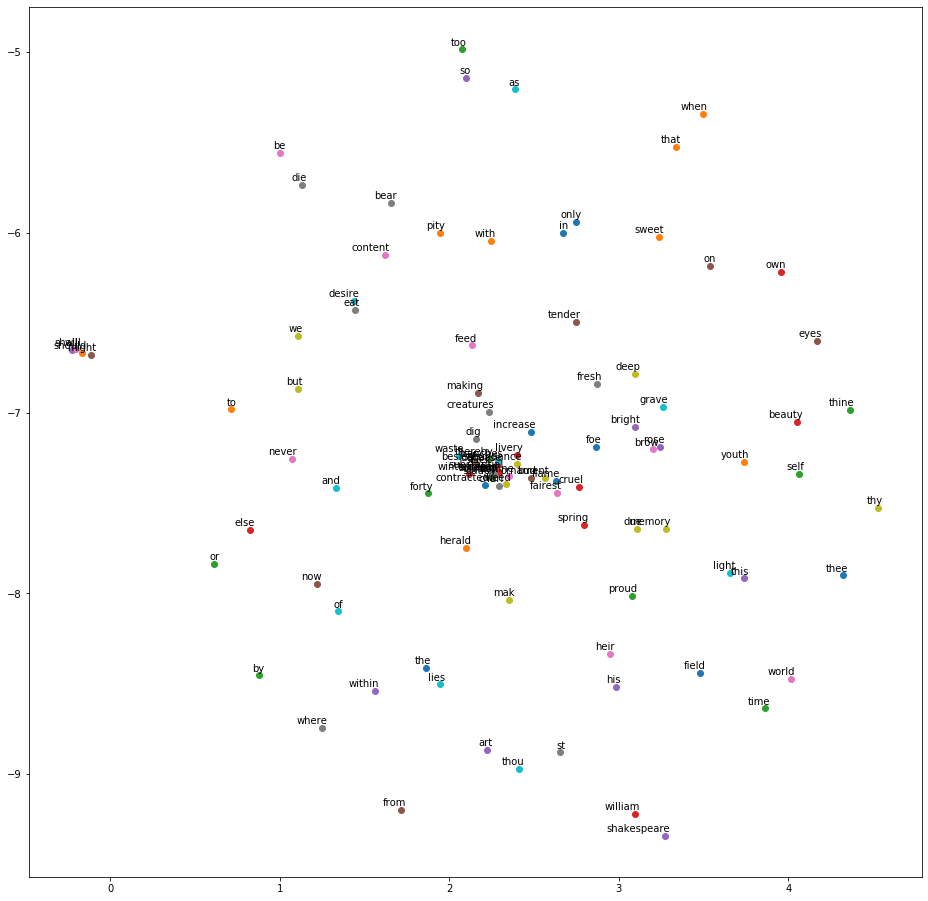

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"

    labels = []
    tokens = []
    
    count = 0
    for word in model.wv.vocab:
        # to speed up the process, let's limit to the first 100 elements
        if count < 100:
            # TODO get the labels
            tokens.append(model[word])
            labels.append(word)
            count = count+1

    # set the t-sne values
    # TODO fit the t-sne model
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=1234)
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
tsne_plot(model)

## References

* https://radimrehurek.com/gensim/models/word2vec.html
* https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568
* https://github.com/kavgan/nlp-text-mining-working-examples/tree/master/word2vec
* https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5